In [ ]:
##How to use Linux

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls -l

total 52236
-rw-r--r-- 1 root root 53477376 May 16 07:35 archive.zip
drwx------ 5 root root     4096 May 16 07:31 drive
drwxr-xr-x 1 root root     4096 May 14 20:30 sample_data


In [ ]:
#change directory (참고로 코드 중간에 주석하면 오류날수도!!!!)
%cd /content/drive/MyDrive/

#make directory
!mkdir intro-dl
%cd /content/drive/MyDrive/intro-dl

/content/drive/MyDrive
/content/drive/MyDrive/intro-dl


In [ ]:
#check current directory
!pwd

/content/drive/MyDrive/intro-dl


In [ ]:
# !unzip -qq zip file name -d destination:
!unzip -qq /content/drive/MyDrive/데이터/archive.zip -d /content/drive/MyDrive/intro-dl

In [ ]:
#현재 directory에 있는 파일 목록(여기서는 afhq 보이는 거 확인)
!ls -l

total 4
drwx------ 4 root root 4096 May 16 07:44 afhq


In [ ]:
%cd afhq
!ls -l
#참고로 코랩에서는 띄어쓰기 꼭 지켜야 함!!

/content/drive/MyDrive/intro-dl/afhq
total 8
drwx------ 5 root root 4096 May 16 07:43 train
drwx------ 5 root root 4096 May 16 07:44 val


In [ ]:
##How to use GPU: 런타임 유형 변경

In [ ]:
#런타임 변경 후 상세정보 출력
!nvidia-smi

Thu May 16 07:50:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#Basic Python Libraries
#1. 파이썬 라이브러리에서 OS 패키지 사용하기: Q. 왜 여기서는 문법이 달라질까?

In [ ]:
#os 패키지 불러오기
import os
#current position
os.getcwd()

#change directory
os.chdir('/content/drive/MyDrive/intro-dl')

#make directory 'temp'
os.mkdir('temp')

#아래 오류 해석: 다시 코드를 돌리면, 이미 temp 파일이 존재하기 때문에 오류 발생

FileExistsError: [Errno 17] File exists: 'temp'

In [ ]:
#현재 directory의 파일 목록 출력
os.listdir(os.getcwd())

# 현재 directory 내 파일 개수
len(os.listdir(os.getcwd()))

2

In [ ]:
#Question1.  How can I move to the directory I want using the library os & Linux Command?
#I'd like to move to the directory name '/content/sample_data'.

# Your Answer

# (1) os
os.chdir('/content/sample_data') #sample data directory로 이동(이미 sample data directory가 존재하는 상황)

In [ ]:
# (2) cd
%cd /content/sample_data

/content


In [ ]:
#2. 파이썬 라이브러리에서 shutil 패키지 사용하기: os랑 같은 문법 사용

In [ ]:
import shutil
os.chdir('/content/drive/MyDrive/intro-dl/afhq')
!ls -l

total 8
drwx------ 2 root root 4096 May 16 07:41 train
drwx------ 2 root root 4096 May 16 07:44 val


In [ ]:
#new.txt 새로운 txt 파일 생성
f = open("new.txt", 'w')
f.close()
!ls -l

total 12
drwx------ 2 root root 4096 May 16 08:06 new_folder
-rw------- 1 root root    0 May 16 08:07 new.txt
-rw------- 1 root root    0 May 16 08:05 next.txt
drwx------ 2 root root 4096 May 16 07:41 train
drwx------ 2 root root 4096 May 16 07:44 val


In [ ]:
!mkdir new_folder
!ls -l

mkdir: cannot create directory ‘new_folder’: File exists
total 12
drwx------ 2 root root 4096 May 16 08:06 new_folder
-rw------- 1 root root    0 May 16 08:07 new.txt
-rw------- 1 root root    0 May 16 08:05 next.txt
drwx------ 2 root root 4096 May 16 07:41 train
drwx------ 2 root root 4096 May 16 07:44 val


In [ ]:
#directory간 파일 이동: 위치 지정
src = '/content/drive/MyDrive/intro-dl/afhq/new.txt' # source directory -- python convention
dst = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new.txt' # destination directory -- python convention

#directory간 파일 이동
shutil.move(src, dst) # from source to target -- move
%cd /content/drive/MyDrive/intro-dl/afhq/new_folder
!ls -l

/content/drive/MyDrive/intro-dl/afhq/new_folder
total 0
-rw------- 1 root root 0 May 16 08:07 new.txt


In [ ]:
#directory간 파일 복사: 위치 지정+파일 이름 바꾸기
src2 = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new.txt' # source directory -- python convention
dst2 = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new2.txt' # destination directory -- python convention
shutil.copy(src2, dst2) # from source to target -- copy
!ls -l

total 0
-rw------- 1 root root 0 May 16 08:12 new2.txt
-rw------- 1 root root 0 May 16 08:07 new.txt


In [ ]:
#Question 2. Please write a code that copies new.txt with a file name new3.txt.
#Directory: /content/drive/MyDrive/intro-dl/afhq/new_folder

# Your Answer
src3 = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new.txt' # source directory
dst3 = '/content/drive/MyDrive/intro-dl/afhq/new_folder/new3.txt' # destination directory
shutil.copy(src3, dst3) # from source to target -- copy
!ls -l

total 0
-rw------- 1 root root 0 May 16 08:12 new2.txt
-rw------- 1 root root 0 May 16 08:14 new3.txt
-rw------- 1 root root 0 May 16 08:07 new.txt


In [ ]:
#Basic Pytorch

In [3]:
import torch
## Simple Question.
## What is (Py)torch?
## Google it and write the answer.

## Your Answer
#파이토치: 기본적으로 파이썬을 기반으로하며 페이스북에서 처음 만들어진 딥러닝에 특화된 라이브러리

In [ ]:
#Representing Scalars with Pytorch (2 ways): 스칼라 연산

In [4]:
scalar1 = torch.tensor([1.])
print(scalar1)
scalar2 = torch.tensor([3.])
print(scalar2)

tensor([1.])
tensor([3.])


In [ ]:
#1안) 직관적인 함수식을 정의해서 사용
#사칙연산 계산-덧셈
add_scalar = scalar1 + scalar2
print(add_scalar)

tensor([4.])


In [ ]:
#사칙연산 계산-뺄셈
sub_scalar = scalar1 - scalar2
print(sub_scalar)

tensor([-2.])


In [ ]:
#사칙연산 계산-곱셈
mul_scalar = scalar1 * scalar2
print(mul_scalar)

tensor([3.])


In [5]:
#사칙연산 계산-나눗셈
div_scalar = scalar1 / scalar2
print(div_scalar)

tensor([0.3333])


In [6]:
#2안) 내장함수 사용
#사칙연산 계산-덧셈
torch.add(scalar1, scalar2)

tensor([4.])

In [7]:
#사칙연산 계산-뺄셈
torch.sub(scalar1, scalar2)

tensor([-2.])

In [8]:
#사칙연산 계산-곱셈
torch.mul(scalar1, scalar2)

tensor([3.])

In [9]:
#사칙연산 계산-나눗셈
torch.div(scalar1, scalar2)

tensor([0.3333])

In [ ]:
#Representing Vectors with Pytorch (2 ways): 벡터 연산

In [ ]:
#벡터 정의
vector1 = torch.tensor([1., 2., 3.])
print(vector1)
vector2 = torch.tensor([4., 5., 6.])
print(vector2)

tensor([1., 2., 3.])
tensor([4., 5., 6.])


In [ ]:
#1안) 직관적인 함수 정의해서 이용
#벡터 덧셈
add_vector = vector1 + vector2
print(add_vector)
#벡터 뺄셈
sub_vector = vector1 - vector2
print(sub_vector)
#벡터 곱셈 Q. 벡터 곱셈 시, 벡터 크기는 어떻게 고려되는걸까? A. 같은 위치에 있는 element끼리 곱하는 느낌이라, 크기가 다르면 연산 자체 불가(연습용 참고)
mul_vector = vector1 * vector2
print(mul_vector)
#벡터 나눗셈
div_vector = vector1 / vector2
print(div_vector)

#Q.1안으로는 내적 계산은 안 되는걸까?

#2안)내장함수 이용
#벡터 덧셈
torch.add(vector1, vector2)
#벡터 뺄셈
torch.sub(vector1, vector2)
#벡터 곱셈
torch.mul(vector1, vector2)
#벡터 나눗셈
torch.div(vector1, vector2)
#벡터 내적
torch.dot(vector1, vector2) # dot product


In [ ]:
#연습
mul_vector = vector1 * vector2
print(mul_vector)

tensor([ 4., 10., 18.])


In [11]:
#연습용
vector3 = torch.tensor([1., 2., 3., 4])
print(vector3)
vector4 = torch.tensor([4., 5., 6.])
print(vector4)
mul_vector = vector3 * vector4
print(mul_vector)

tensor([1., 2., 3., 4.])
tensor([4., 5., 6.])


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [ ]:
#Representing Matrices with Pytorch (2 ways): 행렬 연산

In [ ]:
#행렬 정의
matrix1 = torch.tensor([[1., 2.], [3., 4.]])
print(matrix1)

matrix2 = torch.tensor([[5., 6.], [7., 8.]])
print(matrix2)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [ ]:
#1안)직관적인 함수 정의해서 이용
#행렬합
sum_matrix = matrix1 + matrix2
print(sum_matrix)

#행렬차
sub_matrix = matrix1 - matrix2
print(sub_matrix)

#행렬곱(element-wise)
mul_matrix = matrix1 * matrix2
print(mul_matrix)

#행렬나누기(element-wise)
div_matrix = matrix1 / matrix2
print(div_matrix)

#2안)내장함수 이용
#행렬합
torch.add(matrix1, matrix2) # element-wise addition
#행렬차
torch.sub(matrix1, matrix2) # element-wise subtraction
#행렬곱(element-wise)
torch.mul(matrix1, matrix2) # element-wise multiplication
#행렬나누기(element-wise)
torch.div(matrix1, matrix2) # element-wise division
#행렬곱
torch.matmul(matrix1, matrix2)

In [ ]:
#연습용
torch.mul(matrix1, matrix2)

tensor([[ 5., 12.],
        [21., 32.]])

In [ ]:
#연습용
torch.matmul(matrix1, matrix2)

tensor([[19., 22.],
        [43., 50.]])

In [ ]:
#Question 3. Compute L1/L2 Norm between matrix1 and matrix2 above.
#Hint: https://pytorch.org/docs/stable/generated/torch.linalg.norm.html

## Your Answer

## L1 Norm: 각 element의 절댓값의 합
L1_norm1= torch.norm(matrix1, 1)
L1_norm2= torch.norm(matrix2, 1)

## L2 Norm: 각 element의 제곱값의 합의 제곱근
L2_norm1= torch.norm(matrix1, 2)
L2_norm2= torch.norm(matrix2, 2)

print(L1_norm1, L1_norm2, L2_norm1, L2_norm2)

tensor(10.) tensor(26.) tensor(5.4772) tensor(13.1909)


In [ ]:
## Hard Mode (Optional)
## Compute Cosine Similarity between matrix1 and matrix2 above.

## Your Answer
#벡터의 cosine similartiy 정의: 내적/L2 norm의 곱
#행렬의 cosine similarity 정의: 각 행간의 코사인 유사도를 계산해야 함

#Matrix1
#step1. 각 행의 L2 norm 계산
row_norms1 = torch.norm(matrix1, 2, dim=1) #각 행의 L2 norm 계산을 위해 dim=1 조건 추가
print(row_norms1)

#step2. 각 행을 L2 norm으로 나누어서 정규
normalized_matrix1 = matrix1 / row_norms1

#step3. 각 행들 간의 코사인 유사도 계산
cos_sim1 = torch.mm(normalized_matrix1[0:1], normalized_matrix1 [1:].t())
print(cos_sim1)

#Matrix2
#step1. 각 행의 L2 norm 계산
row_norms2 = torch.norm(matrix2, 2, dim=1)
print(row_norms2)

#step2. 각 행을 L2 norm으로 나누어서 정규
normalized_matrix2 = matrix2 / row_norms2

#step3. 각 행들 간의 코사인 유사도 계산
cos_sim2 = torch.mm(normalized_matrix2[0:1], normalized_matrix2 [1:].t())
print(cos_sim2)

tensor([2.2361, 5.0000])
tensor([[0.9200]])
tensor([ 7.8102, 10.6301])
tensor([[0.9985]])


In [ ]:
#Simple MLP(Multi-Layer Perceptron)
#Question 4. Please write a line-by-line explanation of the code above. (Simple MLP only)

In [ ]:
''' 1. Module Import '''
import numpy as np #numpy 라이브러리(수치계산용)를 np로 부를거야
import matplotlib.pyplot as plt #matplotlib.pyplo 라이브러리(시각화용)를 plt로 부를거야

import torch #pytorch 라이브러리(딥러닝용) 사용
import torch.nn as nn #신경망 구축을 위한 모듈 torch.nn를 nn으로 부를거야
import torch.nn.functional as F #torch.nn.functional를 F라고 부를거야
from torchvision import transforms, datasets #torchvision: 컴퓨터 비전 분야의 데이터셋 로드, 전처리하는 기능

#GPU 연산관리
if torch.cuda.is_available(): #torch.cuda: 수치 연산 가속화하는 pytorch 라이브러리
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE) #사용하는 pytorch 라이브러리 출력

#hyperparameter 정의
BATCH_SIZE = 32 #batch size:32로 정의(hyperparameter)
EPOCHS = 10 #epochs:10으로 정의(hyperparameter)

Using PyTorch version: 2.2.1+cu121  Device: cuda


In [ ]:
''' 3. MNIST Download (Train set, Test set split) '''
#MNIST training data set Download
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True, #train=True: training data
                               download = True,
                               transform = transforms.ToTensor()) #이미지 데이터를 pytorch tensor로 변환

#MNIST test data set Download
test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False, #train=False: test data
                              transform = transforms.ToTensor()) #이미지 데이터를 pytorch tensor로 변환

#앞에서 형성한 training data set를 BATCH_SIZE 크기(=32)의 minibatch로 분할
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True) #shuffle: 데이터 섞기
#앞에서 형성한 test data set를 BATCH_SIZE 크기(=32)의 minibatch로 분할
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False) #shuffle = False: test 데이터의 경우 data shuffle하지 않음. -> Q. 왜일까?


## Quick Question
# What is MNIST?
# Google it and write the answer
#손글씨 숫자 이미지를 분류하기 위한 데이터셋

In [ ]:
#training set에서 첫번째 미니배치를 불러와서 그의 정보 출력
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

#type에 대한 설명
#floatTensor:실수로 이루어진 tensor
#LongTensor: 정수로 이루어진 tensor

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


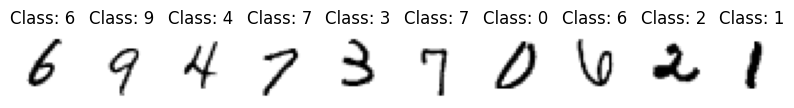

In [ ]:
#plt(Matplotlib)를 사용하여 이미지 시각화하기
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize)) #이미지 크기 결정

#10개의 이미지 출력
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off') #축 제거(여백 없애기)
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r") #i번째 이미지에 대하여,  PyTorch 텐서를 NumPy 배열로 변환한 후, 이미지 크기를 28*28로 재설정, greyscale로 표현
    plt.title('Class: ' + str(y_train[i].item())) #이미지를 읽어낸 결과를 title로 붙이기

In [ ]:
''' Multi Layer Perceptron '''
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512) #linear transformation: 28x28(손글씨 이미지의 픽셀) -> 1x512 : 1d의 벡터의 경우, 간단하게 숫자만 적어도 됨(Assignment2. 참고)
        self.fc2 = nn.Linear(512, 256) #linear transformation: 1x512 -> 1x256
        self.fc3 = nn.Linear(256, 10) #linear transformation: 1x256 -> 10x1(0~9 classification)

#forward pass(순전파) 진행
    def forward(self, x):
        x = x.view(-1, 28 * 28) #Q. -1의 의미가 뭘까? A. Assignment2에 나옴: 현재 불필요한 벡터 크기 신경 안 쓰고 싶고(-1), 내가 목표로 하는 크기(28*28)만 신경쓰고 싶을 때
        x = self.fc1(x)
        x = F.sigmoid(x) #sigmoid 함수 사용: 비선형성 추가
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1) #softmax함수: classification, dim=1: 출력 텐서의 두번째 열에 대해 softmax 적용


In [ ]:
''' Optimizer, Objective Function '''
model = Net().to(DEVICE) #GPU/CPU 선택
#parameter 학습: lr=0.01(learning rate 학습속도 조절), momentum = 0.5(local minimum 방지)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
#Loss function으로 Cross Entropy Loss 함수 이용
criterion = nn.CrossEntropyLoss()

print(model)
#bias=True: 각 layer에 추가되는 상수값(비선형 관계 보장)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
#training model 정의
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader): #batch 단위로 데이터(image, label 쌍형태) 가져오기
        image = image.to(DEVICE) #이미지데이터 GPU로 이동: 연산 GPU에서 수행
        label = label.to(DEVICE) #레이블데이터 연산 GPU에서 수행
        optimizer.zero_grad() #gradient 초기화
        output = model(image) #model에 image를 input으로 입력
        loss = criterion(output, label) #출력값(output)과 label 사이의 loss 계산
        loss.backward() #backpropagation(역전파) 수행
        optimizer.step() #parameter update

        #훈련상태 출력하는 빈도 설정
        if batch_idx % log_interval == 0: #batch_idx가 log_interval의 배수일 때만 아래의 내용을 실행
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), #계산 내용 출력: 현재 epoch, 현재 batch에서 처리된 데이터의 총 개수
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), #전체 batch 중 현재 batch가 몇 퍼센트 진행되었는지 계산
                loss.item())) #현재 loss값

In [ ]:
#test model 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0 #test data set에 대한 loss값 초기화
    correct = 0 #정확하게 예측한 샘플의 수 변수 설정+초기화

    with torch.no_grad():
        for image, label in test_loader: #image와 label에서 하나씩 데이터를 꺼내와서
            image = image.to(DEVICE) #이미지데이터 GPU로 이동: 연산 GPU에서 수행
            label = label.to(DEVICE) #레이블데이터 연산 GPU에서 수행
            output = model(image) #image를 input으로 한 output값 계산
            test_loss += criterion(output, label).item() #누적 loss값 계산
            prediction = output.max(1, keepdim = True)[1] #출력 후, 가장 높은 값을 가지는 class로 classification한 결과값 저장
            correct += prediction.eq(label.view_as(prediction)).sum().item() #예측된 레이블=실제 레이블 개수 세기

    test_loss /= (len(test_loader.dataset) / BATCH_SIZE) #batch당 평균 loss: 총 누적 loss/batch 개수
    test_accuracy = 100. * correct / len(test_loader.dataset) #정확도 계산
    return test_loss, test_accuracy

In [ ]:
#현재 epochs=10으로 정의되어 있으므로, 10번 반복
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200) #train.loader에서 data를 받고 optimizer를 기반으로 model을 학습, log_interval: 훈련상태를 출력하는 간격
    test_loss, test_accuracy = evaluate(model, test_loader) # 테스트 손실과 정확도 계산
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))
#계산 내용 출력: 현재 epoch, loss값(소수점 4자리까지), 모델 정확도(소수점 2자리까지, 백분율로 표시)

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.312260
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.285113
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.336033
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.274081
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.263193
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.314546
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.257350
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.294572
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.234318
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.223304

[EPOCH: 1], 	Test Loss: 2.2409, 	Test Accuracy: 19.65 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.241514
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.175537
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.231271
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.086963
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 1.987395
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.937757
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.912918
T